In [2]:
import pandas as pd

In [3]:
df= pd.read_csv('./db/covid_19_data.csv')
df.sample(10)
df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])

In [4]:
list(df)

['SNo',
 'ObservationDate',
 'Province/State',
 'Country/Region',
 'Last Update',
 'Confirmed',
 'Deaths',
 'Recovered']

In [69]:
df = df[[
 'ObservationDate',
 'Country/Region',
 'Confirmed',
 'Deaths',
 'Recovered']
]
df

,ObservationDate,Country/Region,Confirmed,Deaths,Recovered
0,2020-01-22,Mainland China,1.0,0.0,0.0
1,2020-01-22,Mainland China,14.0,0.0,0.0
2,2020-01-22,Mainland China,6.0,0.0,0.0
3,2020-01-22,Mainland China,1.0,0.0,0.0
4,2020-01-22,Mainland China,0.0,0.0,0.0
...,...,...,...,...,...
85633,2020-08-12,Ukraine,971.0,22.0,680.0
85634,2020-08-12,Netherlands,950.0,69.0,0.0
85635,2020-08-12,Mainland China,1275.0,1.0,1268.0
85636,2020-08-12,Ukraine,2215.0,48.0,1574.0


In [6]:
df_time = df.groupby('ObservationDate').sum()
df_time.tail(5)

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-08-08,19637506.0,726781.0,11939109.0
2020-08-09,19861683.0,731326.0,12115825.0
2020-08-10,20089624.0,736191.0,12280520.0
2020-08-11,20343589.0,742615.0,12585473.0
2020-08-12,20620847.0,749358.0,12826815.0


In [7]:
df_conf = df_time['Confirmed']
df_death = df_time['Deaths']
df_conf.tail(5)

ObservationDate
2020-08-08    19637506.0
2020-08-09    19861683.0
2020-08-10    20089624.0
2020-08-11    20343589.0
2020-08-12    20620847.0
Name: Confirmed, dtype: float64

In [8]:
df_conf - df_death

ObservationDate
2020-01-22         538.0
2020-01-23         635.0
2020-01-24         915.0
2020-01-25        1396.0
2020-01-26        2062.0
                 ...    
2020-08-08    18910725.0
2020-08-09    19130357.0
2020-08-10    19353433.0
2020-08-11    19600974.0
2020-08-12    19871489.0
Length: 204, dtype: float64

In [9]:
df_time

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,555.0,17.0,28.0
2020-01-23,653.0,18.0,30.0
2020-01-24,941.0,26.0,36.0
2020-01-25,1438.0,42.0,39.0
2020-01-26,2118.0,56.0,52.0
...,...,...,...
2020-08-08,19637506.0,726781.0,11939109.0
2020-08-09,19861683.0,731326.0,12115825.0
2020-08-10,20089624.0,736191.0,12280520.0


In [16]:
df_diff=df_time.diff()
df_diff

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,NaN,NaN,NaN
2020-01-23,98.0,1.0,2.0
2020-01-24,288.0,8.0,6.0
2020-01-25,497.0,16.0,3.0
2020-01-26,680.0,14.0,13.0
...,...,...,...
2020-08-08,259470.0,5457.0,201182.0
2020-08-09,224177.0,4545.0,176716.0
2020-08-10,227941.0,4865.0,164695.0


In [18]:
df_time.head(1).to_dict()

{'Confirmed': {Timestamp('2020-01-22 00:00:00'): 555.0},
 'Deaths': {Timestamp('2020-01-22 00:00:00'): 17.0},
 'Recovered': {Timestamp('2020-01-22 00:00:00'): 28.0}}

In [27]:
df_diff=df_diff.fillna({'Confirmed': 555.0,
 'Deaths': 17.0,
 'Recovered': 28.0})


,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-31,9925.0,213.0,222.0
2020-02-29,76088.0,2728.0,39560.0
2020-03-31,771474.0,39166.0,138246.0
2020-04-30,2399359.0,191281.0,836725.0
2020-05-31,2910100.0,138647.0,1626576.0
2020-06-30,4308892.0,139218.0,2711943.0
2020-07-31,7123998.0,168247.0,5015868.0
2020-08-31,3021011.0,69858.0,2457675.0


In [31]:
df_diff.resample('M').mean()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-31,992.500000,21.300000,22.200000
2020-02-29,2623.724138,94.068966,1364.137931
2020-03-31,24886.258065,1263.419355,4459.548387
2020-04-30,79978.633333,6376.033333,27890.833333
2020-05-31,93874.193548,4472.483871,52470.193548
2020-06-30,143629.733333,4640.600000,90398.100000
2020-07-31,229806.387097,5427.322581,161802.193548
2020-08-31,251750.916667,5821.500000,204806.250000


In [39]:
df_cum=df_time.resample('12h').sum(min_count=1)
df_cum

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22 00:00:00,555.0,17.0,28.0
2020-01-22 12:00:00,NaN,NaN,NaN
2020-01-23 00:00:00,653.0,18.0,30.0
2020-01-23 12:00:00,NaN,NaN,NaN
2020-01-24 00:00:00,941.0,26.0,36.0
...,...,...,...
2020-08-10 00:00:00,20089624.0,736191.0,12280520.0
2020-08-10 12:00:00,NaN,NaN,NaN
2020-08-11 00:00:00,20343589.0,742615.0,12585473.0


In [40]:
df_cum = df_cum.interpolate()
df_cum

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22 00:00:00,555.0,17.0,28.0
2020-01-22 12:00:00,604.0,17.5,29.0
2020-01-23 00:00:00,653.0,18.0,30.0
2020-01-23 12:00:00,797.0,22.0,33.0
2020-01-24 00:00:00,941.0,26.0,36.0
...,...,...,...
2020-08-10 00:00:00,20089624.0,736191.0,12280520.0
2020-08-10 12:00:00,20216606.5,739403.0,12432996.5
2020-08-11 00:00:00,20343589.0,742615.0,12585473.0


In [41]:
df_cum['rate'] = 1-df_cum['Deaths']/df_cum['Confirmed']


In [43]:
df_cum = df_cum.reset_index()
df_cum

,ObservationDate,Confirmed,Deaths,Recovered,rate
0,2020-01-22 00:00:00,555.0,17.0,28.0,0.969369
1,2020-01-22 12:00:00,604.0,17.5,29.0,0.971026
2,2020-01-23 00:00:00,653.0,18.0,30.0,0.972435
3,2020-01-23 12:00:00,797.0,22.0,33.0,0.972396
4,2020-01-24 00:00:00,941.0,26.0,36.0,0.972370
...,...,...,...,...,...
402,2020-08-10 00:00:00,20089624.0,736191.0,12280520.0,0.963355
403,2020-08-10 12:00:00,20216606.5,739403.0,12432996.5,0.963426
404,2020-08-11 00:00:00,20343589.0,742615.0,12585473.0,0.963496
405,2020-08-11 12:00:00,20482218.0,745986.5,12706144.0,0.963579


In [45]:
df_cum.groupby(pd.Grouper(key = 'ObservationDate', freq = 'M'))[['rate']].mean()

,rate
ObservationDate,
2020-01-31,0.974594
2020-02-29,0.973562
2020-03-31,0.960070
2020-04-30,0.936029
2020-05-31,0.933422
2020-06-30,0.945713
2020-07-31,0.957037
2020-08-31,0.962681


<AxesSubplot:xlabel='ObservationDate'>

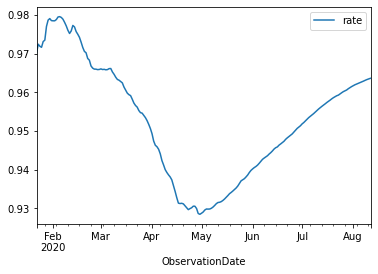

In [47]:
sr=df_cum.groupby(pd.Grouper(key = 'ObservationDate', freq = '1D'))[['rate']].mean()
sr.plot()

<AxesSubplot:xlabel='ObservationDate'>

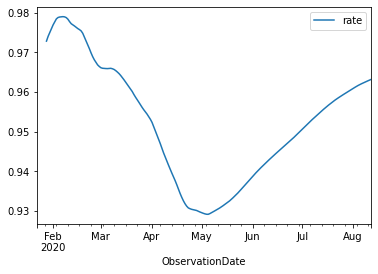

In [49]:
sr.rolling(window = 7).mean().plot()

Text(0.5, 1.0, 'Promedio móvil de Tasa de Supervivencia')

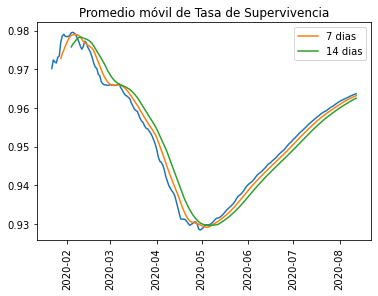

In [58]:
import matplotlib.pyplot as plt
plt.plot(sr)
plt.plot(sr.rolling(window = 7).mean(),label = '7 dias')
plt.plot(sr.rolling(window = 14).mean(),label = '14 dias')
plt.xticks(rotation = '90')
plt.legend()
plt.title('Promedio móvil de Tasa de Supervivencia')

Text(0.5, 1.0, 'Varianza de Tasa de Supervivencia')

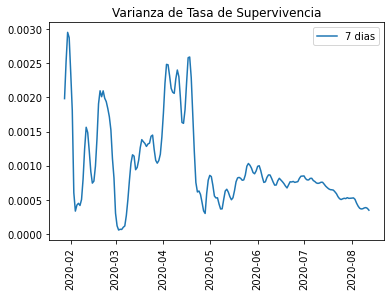

In [60]:
import numpy as np
plt.plot(sr.rolling(window = 7).apply(lambda x : np.std(x)),label = '7 dias')
plt.xticks(rotation = '90')
plt.legend()
plt.title('Varianza de Tasa de Supervivencia')

In [62]:
df.groupby('Country/Region')['Confirmed'].max().sort_values(ascending = False)

Country/Region
Brazil             655181.0
US                 591376.0
South Africa       568919.0
India              548313.0
Russia             405843.0
                     ...   
Gambia, The             1.0
East Timor              1.0
Curacao                 1.0
Channel Islands         1.0
 Azerbaijan             1.0
Name: Confirmed, Length: 223, dtype: float64

In [65]:
df_time =df.groupby(['Country/Region',pd.Grouper(key='ObservationDate',freq='1D')]).sum()
df_time

Confirmed  Deaths  Recovered
Country/Region                 ObservationDate                              
 Azerbaijan                    2020-02-28             1.0     0.0        0.0
('St. Martin',)                2020-03-10             2.0     0.0        0.0
Afghanistan                    2020-02-24             1.0     0.0        0.0
                               2020-02-25             1.0     0.0        0.0
                               2020-02-26             1.0     0.0        0.0
...                                                   ...     ...        ...
occupied Palestinian territory 2020-03-12             0.0     0.0        0.0
                               2020-03-14             0.0     0.0        0.0
                               2020-03-15             0.0     0.0        0.0
                               2020-03-16             0.0     0.0        0.0
                               2020-03-17             0.0     0.0        0.0

[30851 rows x 3 columns]

In [71]:
df_colombia = df_time.loc['Colombia',:]

Text(0, 0.5, 'People')

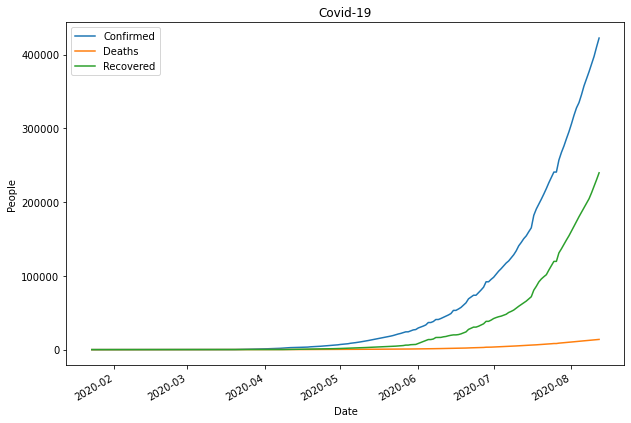

In [76]:
df_colombia.plot(figsize = (10,7), title ='Covid-19')
plt.xlabel('Date')
plt.ylabel('People')

In [82]:
df_monthly = df_colombia.resample('M').max()
df_monthly=df_monthly.interpolate()
df_monthly

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-31,0.0,0.0,0.0
2020-02-29,453.0,8.0,15.5
2020-03-31,906.0,16.0,31.0
2020-04-30,6507.0,293.0,1439.0
2020-05-31,27219.0,916.0,7032.0
2020-06-30,95269.0,3376.0,40021.0
2020-07-31,295508.0,10105.0,154387.0
2020-08-31,422519.0,13837.0,239785.0


<AxesSubplot:xlabel='ObservationDate'>

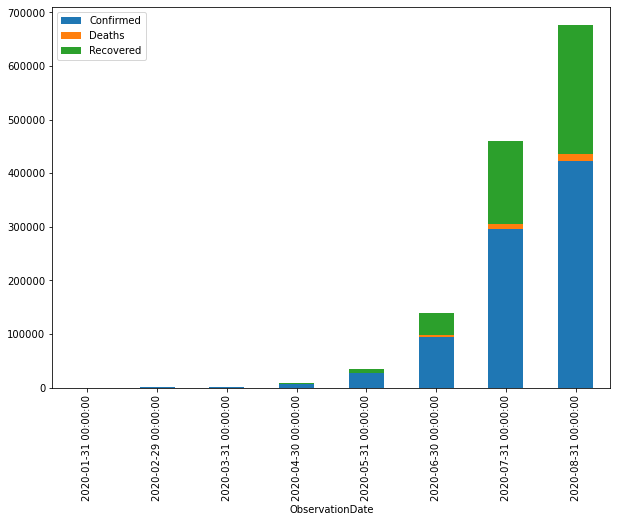

In [83]:
df_monthly.plot(kind='bar',figsize = (10,7),stacked=True)

In [84]:
df_monthly['Traitment'] = df_monthly['Confirmed'] - df_monthly['Deaths']-df_monthly['Recovered']

df_monthly

,Confirmed,Deaths,Recovered,Traitment
ObservationDate,,,,
2020-01-31,0.0,0.0,0.0,0.0
2020-02-29,453.0,8.0,15.5,429.5
2020-03-31,906.0,16.0,31.0,859.0
2020-04-30,6507.0,293.0,1439.0,4775.0
2020-05-31,27219.0,916.0,7032.0,19271.0
2020-06-30,95269.0,3376.0,40021.0,51872.0
2020-07-31,295508.0,10105.0,154387.0,131016.0
2020-08-31,422519.0,13837.0,239785.0,168897.0


No handles with labels found to put in legend.


array([<AxesSubplot:ylabel='2020-01-31 00:00:00'>,
       <AxesSubplot:ylabel='2020-02-29 00:00:00'>,
       <AxesSubplot:ylabel='2020-03-31 00:00:00'>,
       <AxesSubplot:ylabel='2020-04-30 00:00:00'>,
       <AxesSubplot:ylabel='2020-05-31 00:00:00'>,
       <AxesSubplot:ylabel='2020-06-30 00:00:00'>,
       <AxesSubplot:ylabel='2020-07-31 00:00:00'>,
       <AxesSubplot:ylabel='2020-08-31 00:00:00'>], dtype=object)

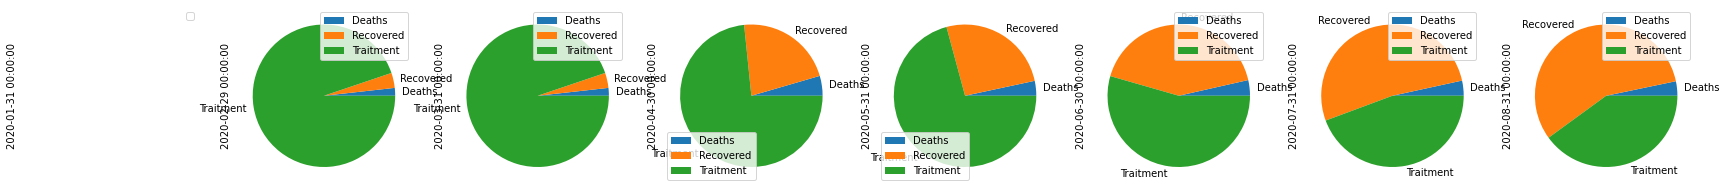

In [94]:
df_monthly[['Deaths','Recovered','Traitment']].T.plot(figsize = (30,7), kind = 'pie', subplots = True)


<AxesSubplot:>

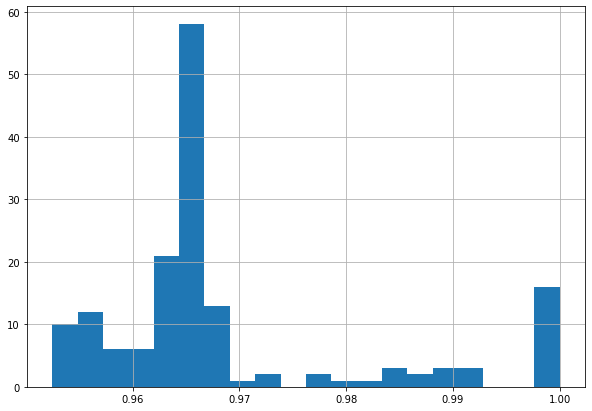

In [102]:
df_colombia['rate'] = 1-df_colombia['Deaths']/df_colombia['Confirmed']
df_colombia['rate'].hist(figsize = (10,7), bins = 20)

<AxesSubplot:ylabel='Density'>

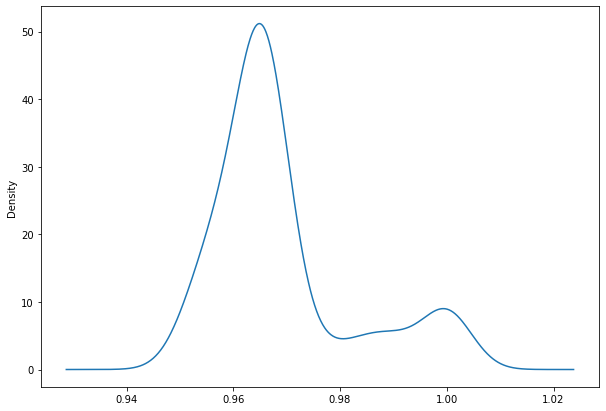

In [106]:
df_colombia['rate'].plot(kind ='kde', figsize = (10,7))

In [151]:
df_list=['Colombia','Mexico','Costa Rica','US','Brazil']
df_time =df.groupby(['Country/Region',pd.Grouper(key='ObservationDate',freq='M')]).sum()
df_latam = df_time.loc[df_list,:]
#df_latam['rate'] = 1-df_latam['Deaths']/df_latam['Confirmed']
#df_latam = df_latam.interpolate()
df_latam.head(10)

Confirmed    Deaths  Recovered
Country/Region ObservationDate                                
Colombia       2020-01-31             0.0       0.0        0.0
               2020-03-31          6132.0      68.0      109.0
               2020-04-30        101522.0    4236.0    17078.0
               2020-05-31        486041.0   17967.0   118612.0
               2020-06-30       1698303.0   58061.0   669012.0
               2020-07-31       5598108.0  196918.0  2601550.0
               2020-08-31       4352235.0  144973.0  2368074.0
Mexico         2020-01-31             0.0       0.0        0.0
               2020-02-29             5.0       0.0        0.0
               2020-03-31          6921.0     108.0      157.0